# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [18]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [19]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [20]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [58]:
# Create a Beautiful Soup Objectb
soup = BeautifulSoup(browser.html, 'html.parser')

In [60]:
# Extract table data
mars_weather_table = soup.find('table')

#Pandas Alternative to extracting rows of data
mars_weather_pd = pd.read_html(url)

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [61]:
# Create an empty list
column_names = []
table_dataset = []

# Loop through the scraped data to create a list of rows
#Extract column names
for column in soup.find_all('th'):
    column_names.append(column.text.strip())

# Extract all rows of data
for table in soup.find('table').find_all('tr'):
    row = [data.text for data in table.find_all('td')]
    table_dataset.append(row)
    
#Replace item[0] which is blank with the column_names
#This provides the string list of the table but not needed
#table_dataset[0] = column_names

In [63]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_weather_table_pd = pd.DataFrame(table_dataset, columns=column_names)

#Remove the empty row
mars_weather_table_pd = mars_weather_table_pd.drop(axis=0, index=0)


In [64]:
# Confirm DataFrame was created successfully
mars_weather_table_pd

,id,terrestrial_date,sol,ls,month,min_temp,pressure
1,2,2012-08-16,10,155,6,-75.0,739.0
2,13,2012-08-17,11,156,6,-76.0,740.0
3,24,2012-08-18,12,156,6,-76.0,741.0
4,35,2012-08-19,13,157,6,-74.0,732.0
5,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1863,1889,2018-02-23,1973,133,5,-78.0,730.0
1864,1892,2018-02-24,1974,134,5,-77.0,729.0
1865,1894,2018-02-25,1975,134,5,-76.0,729.0
1866,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [67]:
# Examine data type of each column
mars_weather_table_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 1 to 1867
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1867 non-null   object
 1   terrestrial_date  1867 non-null   object
 2   sol               1867 non-null   object
 3   ls                1867 non-null   object
 4   month             1867 non-null   object
 5   min_temp          1867 non-null   object
 6   pressure          1867 non-null   object
dtypes: object(7)
memory usage: 102.2+ KB


In [91]:
# Change data types for data analysis
mars_weather_table_pd = mars_weather_table_pd.astype({
    'id': 'object',
    'terrestrial_date': 'datetime64[ns]',
    'sol': 'int64',
    'ls': 'int64',
    'month': 'int64',
    'min_temp': 'float64',
    'pressure': 'float64'
})
mars_weather_table_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 1 to 1867
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   object        
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int64         
 3   ls                1867 non-null   int64         
 4   month             1867 non-null   int64         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 102.2+ KB


In [130]:
# Confirm type changes were successful by examining data types again
mars_weather_table_pd.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [98]:
# 1. How many months are there on Mars?
mars_weather_table_pd['month'].value_counts().sort_index()

month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: count, dtype: int64

In [116]:
# 2. How many Martian days' worth of data are there?
#Technically it is Earth days worth of data not Martian days
Earth_days = mars_weather_table_pd['terrestrial_date'].value_counts().sum()

#But Mars days are approximately 40 mins longer than Earth days
Mars_days = Earth_days+Earth_days*(40/1440)

print(f"Total Earth Days: {(Earth_days)}")
print(f"Total Martian Days: {round(Mars_days,0)}")

Total Earth Days: 1867
Total Martian Days: 1919.0


In [134]:
# 3. What is the average low temperature by month?
mars_month_min_temp = mars_weather_table_pd.groupby(['month']).agg({'min_temp':"mean"})
mars_month_min_temp

,min_temp
month,
1,-77.160920
2,-79.932584
3,-83.307292
4,-82.747423
5,-79.308725
6,-75.299320
7,-72.281690
8,-68.382979
9,-69.171642


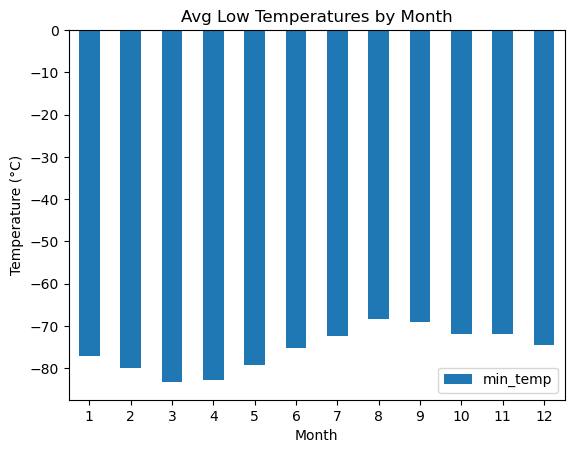

In [139]:
# Plot the average temperature by month
mars_month_min_temp.plot.bar(title="Avg Low Temperatures by Month",
                             xlabel="Month", 
                             ylabel="Temperature (°C)",
                             rot=0
                            )
plt.savefig('Outputs/Average_Low_Temperaures_By_Month.png')

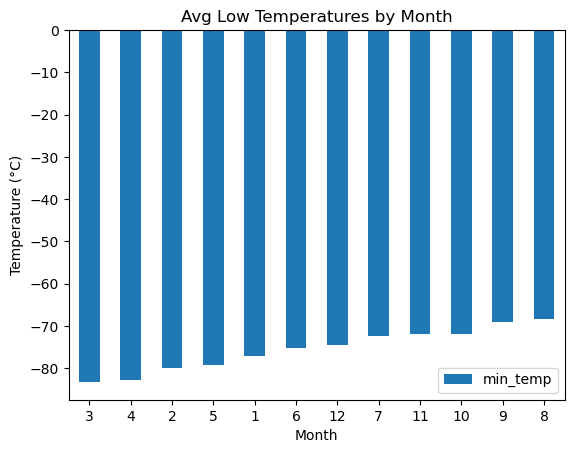

In [146]:
# Identify the coldest and hottest months in Curiosity's location
mars_month_min_temp = mars_month_min_temp.sort_values("min_temp")
mars_month_min_temp.plot.bar(title="Avg Low Temperatures by Month",
                             xlabel="Month", 
                             ylabel="Temperature (°C)",
                             rot=0
                            )
plt.savefig('Outputs/Average_Low_Temperaures_By_Month_Sorted.png')

In [148]:
# 4. Average pressure by Martian month
mars_month_pressure = mars_weather_table_pd.groupby(['month']).agg({'pressure':"mean"})
print(mars_month_pressure)

         pressure
month            
1      862.488506
2      889.455056
3      877.322917
4      806.329897
5      748.557047
6      745.054422
7      795.105634
8      873.829787
9      913.305970
10     887.312500
11     857.014493
12     842.156627


<Axes: title={'center': 'Avg Pressure by Month'}, xlabel='Month', ylabel='Atmospheric Pressure'>

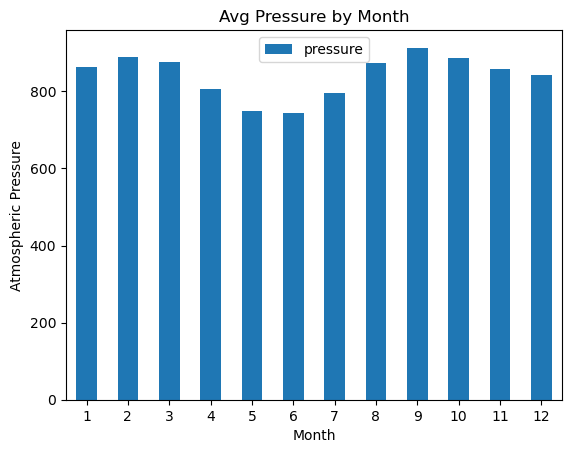

In [149]:
# Plot the average pressure by month
mars_month_pressure.plot.bar(title="Avg Pressure by Month",
                             xlabel="Month", 
                             ylabel="Atmospheric Pressure",
                             rot=0
                            )
plt.savefig('Outputs/Average_Pressure_By_Month.png')

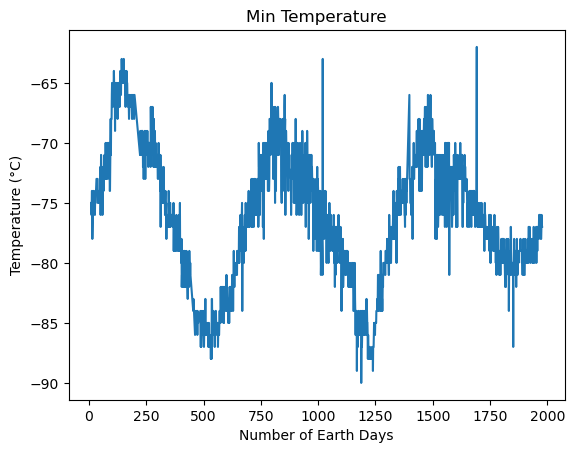

<Figure size 640x480 with 0 Axes>

In [152]:
# 5. How many terrestrial (earth) days are there in a Martian year?
#Question is very confusing rephrase it for the next round of students

plt.plot(mars_weather_table_pd["sol"], mars_weather_table_pd["min_temp"])
plt.title("Min Temperature")
plt.xlabel("Number of Earth Days")
plt.ylabel("Temperature (°C)")
plt.show()

plt.savefig('Outputs/Min_Temperaures_By_Earth_Days.png')

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [153]:
# Write the data to a CSV
mars_weather_table_pd.to_csv("Outputs/Mars_Weather_Report.csv", header=True, index=False, date_format="%Y-%m-%d")

In [21]:
browser.quit()